In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import io

In [4]:
logdata = pd.read_csv("task_durations.csv")

In [5]:
print(logdata)

       Cycle                            Task           Start DateTime  \
0          0                         IsReady  2022-10-04 14:14:41.978   
1          0          InitializeProductGroup  2022-10-04 14:14:42.487   
2          1                    StartOfCycle  2022-10-04 14:14:45.625   
3          1                  GetS0ensorType  2022-10-04 14:14:45.691   
4          1                   GetSensorType  2022-10-04 14:14:45.745   
...      ...                             ...                      ...   
21405   1240            TransferTasksToRobot  2022-11-14 09:25:00.878   
21406   1240            TransferTasksToRobot  2022-11-14 09:25:04.677   
21407   1240            TransferTasksToRobot  2022-11-14 09:25:05.359   
21408   1240  InternalRecognizeWithIteration  2022-11-14 09:25:00.831   
21409   1240            TransferTasksToRobot  2022-11-14 09:25:05.791   

                  End DateTime  Duration  
0      2022-10-04 14:14:41.978     0.000  
1      2022-10-04 14:14:45.571     3.

In [6]:
logdata

,Cycle,Task,Start DateTime,End DateTime,Duration
0,0,IsReady,2022-10-04 14:14:41.978,2022-10-04 14:14:41.978,0.000
1,0,InitializeProductGroup,2022-10-04 14:14:42.487,2022-10-04 14:14:45.571,3.084
2,1,StartOfCycle,2022-10-04 14:14:45.625,2022-10-04 14:14:45.625,0.000
3,1,GetS0ensorType,2022-10-04 14:14:45.691,2022-10-04 14:14:45.692,0.001
4,1,GetSensorType,2022-10-04 14:14:45.745,2022-10-04 14:14:45.746,0.001
...,...,...,...,...,...
21405,1240,TransferTasksToRobot,2022-11-14 09:25:00.878,2022-11-14 09:25:01.860,0.982
21406,1240,TransferTasksToRobot,2022-11-14 09:25:04.677,2022-11-14 09:25:04.744,0.067
21407,1240,TransferTasksToRobot,2022-11-14 09:25:05.359,2022-11-14 09:25:05.424,0.065
21408,1240,InternalRecognizeWithIteration,2022-11-14 09:25:00.831,2022-11-14 09:25:05.739,4.908


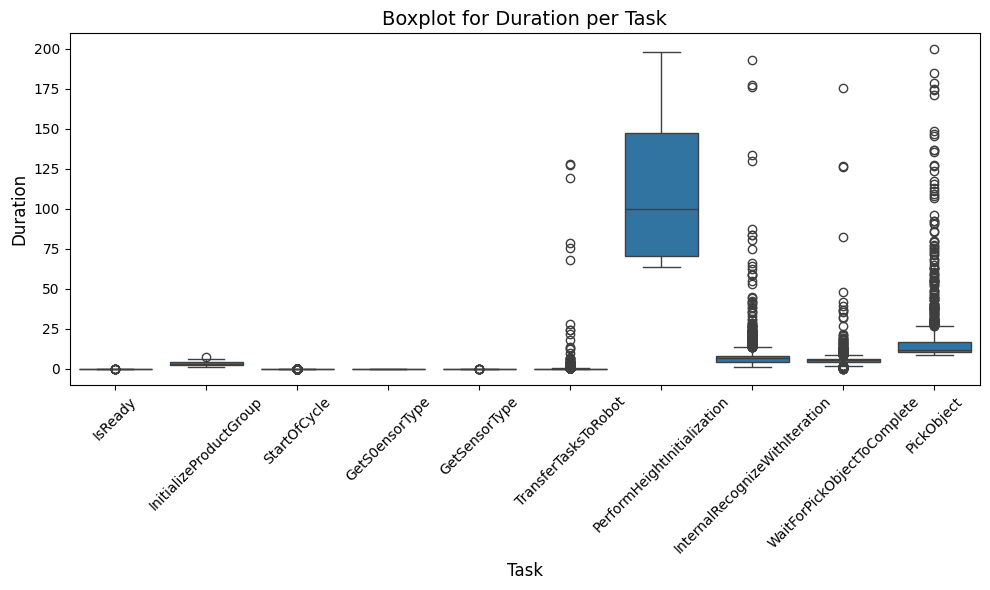

In [16]:
# Fjern outliers, hvor Duration er over 200 sekunder
data = logdata[logdata['Duration'] <= 200]

# Boxplot af Duration for hver Task
plt.figure(figsize=(10, 6))

sns.boxplot(x='Task', y='Duration', data=data)

# Tilpasning af plot
plt.title('Boxplot for Duration per Task', fontsize=14)
plt.xlabel('Task', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

# Vis plot
plt.show()

In [17]:
# Hjælpefunktion til at beregne varighed i sekunder
def calculate_duration(row):
    time_formats = [
        "%Y-%m-%d %H-%M-%S.%f",  # Format med millisekunder
        "%Y-%m-%d %H-%M-%S",     # Format uden millisekunder
    ]
   
    for time_format in time_formats:
        try:
            start_time = datetime.strptime(row['Time Start'], time_format)
            end_time = datetime.strptime(row['Time End'], time_format)
            return (end_time - start_time).total_seconds()
        except ValueError:
            continue  # Prøv næste format
   
    # Hvis ingen formater matcher, kast en fejl
    raise ValueError(f"Time data does not match known formats: {row['Time Start']} or {row['Time End']}")

# Beregn varighed, hvis ikke allerede i data
if 'Duration (s)' not in logdata.columns:
    logdata['Duration (s)'] = logdata.apply(calculate_duration, axis=1)

# Opret boxplot for hver task-type
plt.figure(figsize=(10, 6))
df.boxplot(column='Duration (s)', by='Task', grid=False, showfliers=False)
plt.title('Task Durations')
plt.suptitle('')  # Fjern default subtitle
plt.xlabel('Task')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Gem og vis plot
output_plot = 'task_durations_boxplot.png'
plt.savefig(output_plot)
plt.show()

# Print DataFrame for at tjekke data
print(logdata.head())

ValueError: Time data does not match known formats: 14-14-41.978 or 14-14-41.978

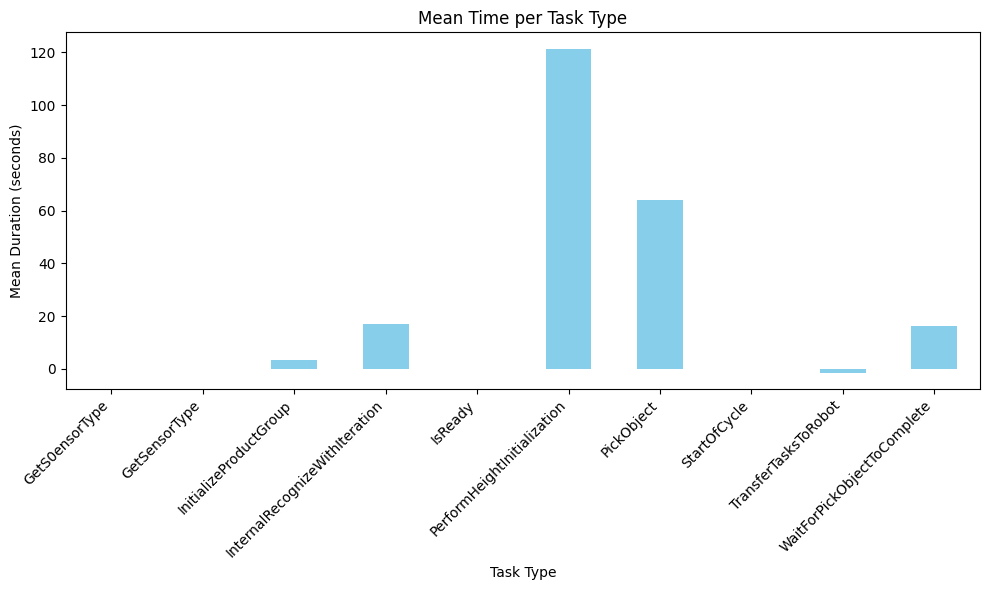

In [18]:
# Konverter tidspunkter til datetime objekter (hvis ikke allerede gjort)
logdata['Time Start'] = pd.to_datetime(logdata['Time Start'], format='%H-%M-%S.%f')
logdata['Time End'] = pd.to_datetime(logdata['Time End'], format='%H-%M-%S.%f')

# Beregn varigheden af hver opgave (i sekunder)
logdata['Duration'] = (logdata['Time End'] - logdata['Time Start']).dt.total_seconds()

# Beregn gennemsnitstiden per tasktype
mean_times = logdata.groupby('Task')['Duration'].mean()

# Plot resultaterne
plt.figure(figsize=(10, 6))
mean_times.plot(kind='bar', color='skyblue')
plt.title('Mean Time per Task Type')
plt.xlabel('Task Type')
plt.ylabel('Mean Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
logdata.head

<bound method NDFrame.head of        Cycle                            Task        Date  \
0          0                         IsReady  2022-10-04   
1          0          InitializeProductGroup  2022-10-04   
2          1                    StartOfCycle  2022-10-04   
3          1                  GetS0ensorType  2022-10-04   
4          1                   GetSensorType  2022-10-04   
...      ...                             ...         ...   
21405   1240            TransferTasksToRobot  2022-11-14   
21406   1240            TransferTasksToRobot  2022-11-14   
21407   1240            TransferTasksToRobot  2022-11-14   
21408   1240  InternalRecognizeWithIteration  2022-11-14   
21409   1240            TransferTasksToRobot  2022-11-14   

                   Time Start                Time End  Duration  
0     1900-01-01 14:14:41.978 1900-01-01 14:14:41.978     0.000  
1     1900-01-01 14:14:42.487 1900-01-01 14:14:45.571     3.084  
2     1900-01-01 14:14:45.625 1900-01-01 14:14:45.6

<Figure size 1000x600 with 0 Axes>

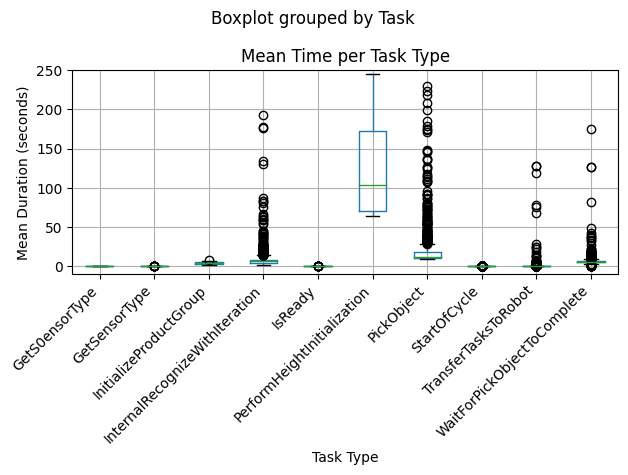

In [21]:
# Konverter tidspunkter til datetime objekter (hvis ikke allerede gjort)
logdata['Time Start'] = pd.to_datetime(logdata['Time Start'], format='%H-%M-%S.%f')
logdata['Time End'] = pd.to_datetime(logdata['Time End'], format='%H-%M-%S.%f')

# Beregn varigheden af hver opgave (i sekunder)
logdata['Duration'] = (logdata['Time End'] - logdata['Time Start']).dt.total_seconds()

# Plot resultaterne
plt.figure(figsize=(10, 6))
logdata.boxplot(column='Duration', by='Task')
plt.ylim(-10,250)
plt.title('Mean Time per Task Type')
plt.xlabel('Task Type')
plt.ylabel('Mean Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

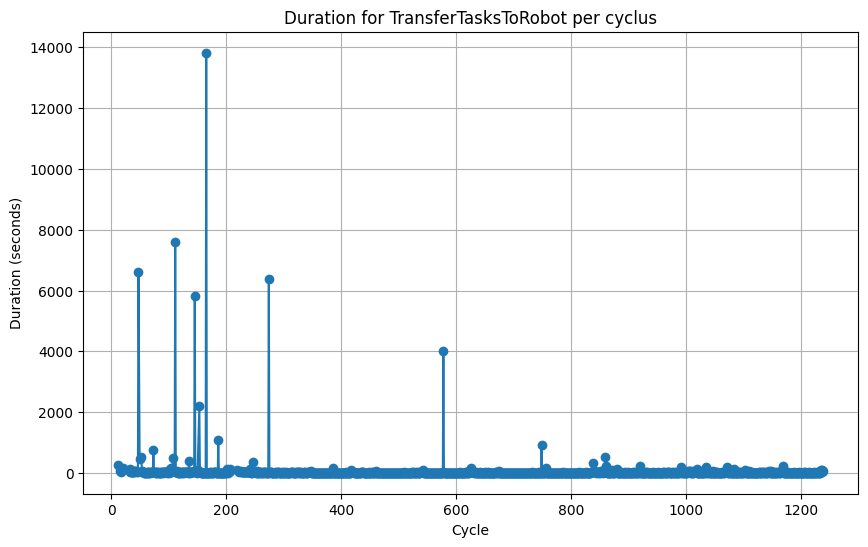

In [26]:
task_type = 'PickObject'
filtered_logata = logdata[logdata['Task'] == task_type]

plt.figure(figsize=(10,6))
plt.plot(filtered_logata['Cycle'], filtered_logata['Duration'], marker='o', linestyle='-')
plt.title(f'Duration for TransferTasksToRobot per cyclus')
plt.xlabel('Cycle')
plt.ylabel('Duration (seconds)')

plt.grid(True)
plt.show()

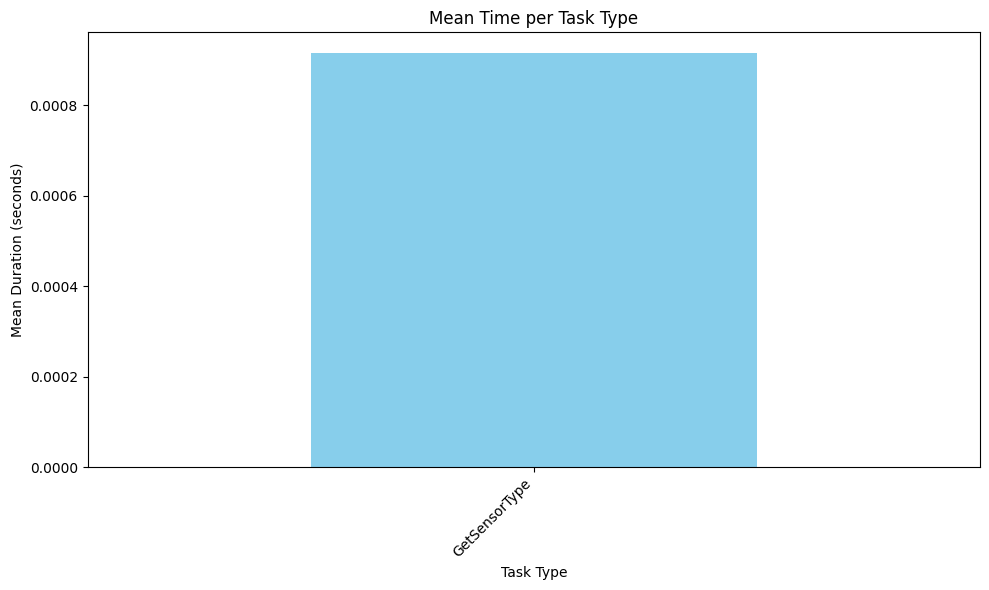

In [23]:
task_type = 'GetSensorType'
filtered_logata = logdata[logdata['Task'] == task_type]

# Beregn gennemsnitstiden per tasktype
mean_times = filtered_logata.groupby('Task')['Duration'].mean()

# Plot resultaterne
plt.figure(figsize=(10, 6))
mean_times.plot(kind='bar', color='skyblue')
plt.title('Mean Time per Task Type')
plt.xlabel('Task Type')
plt.ylabel('Mean Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

c:\Users\student\Visualisering Scape\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


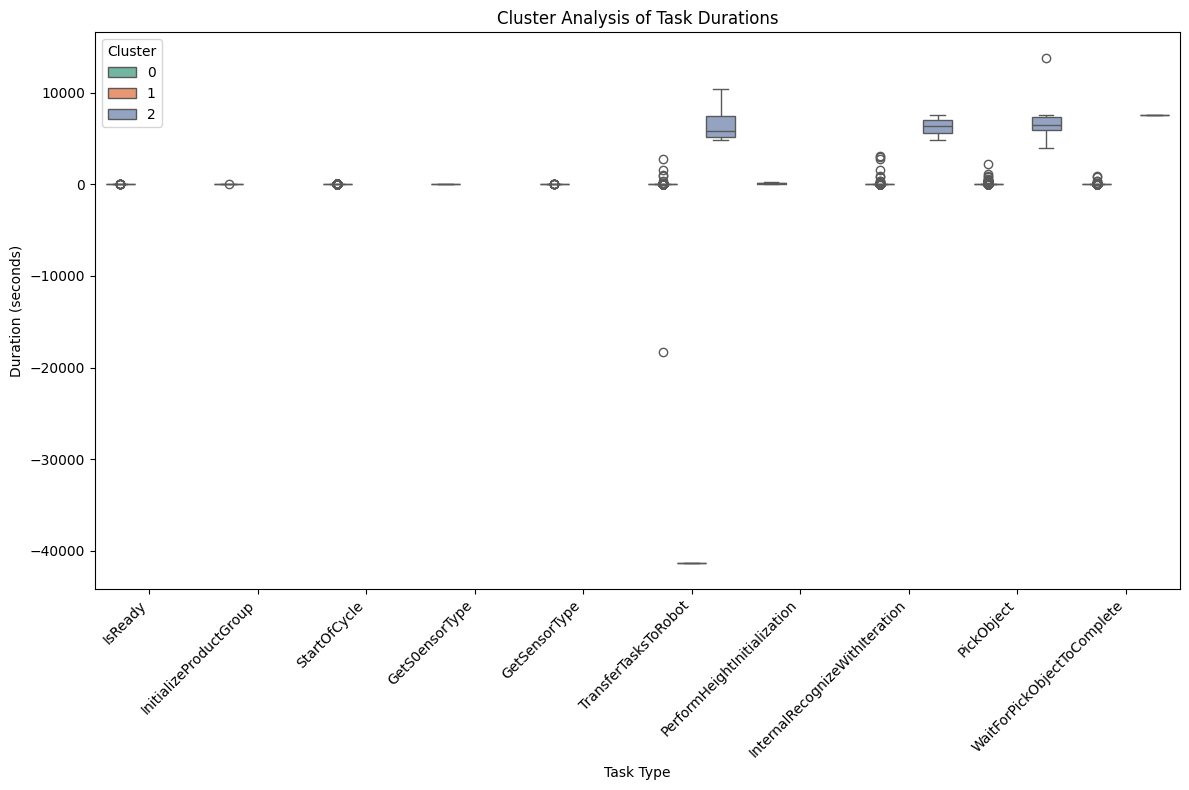

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Vælg data til clustering
tasks = logdata[['Task', 'Duration']].copy()

# Standardisér varighed for bedre klyngeanalyse
scaler = StandardScaler()
tasks['Scaled Duration'] = scaler.fit_transform(tasks[['Duration']])

# Vælg antal klynger (K) for K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Juster n_clusters efter behov
tasks['Cluster'] = kmeans.fit_predict(tasks[['Scaled Duration']])

# Visualiser resultater
plt.figure(figsize=(12, 8))
sns.boxplot(x='Task', y='Duration', hue='Cluster', data=tasks, palette='Set2')
plt.title('Cluster Analysis of Task Durations')
plt.xlabel('Task Type')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

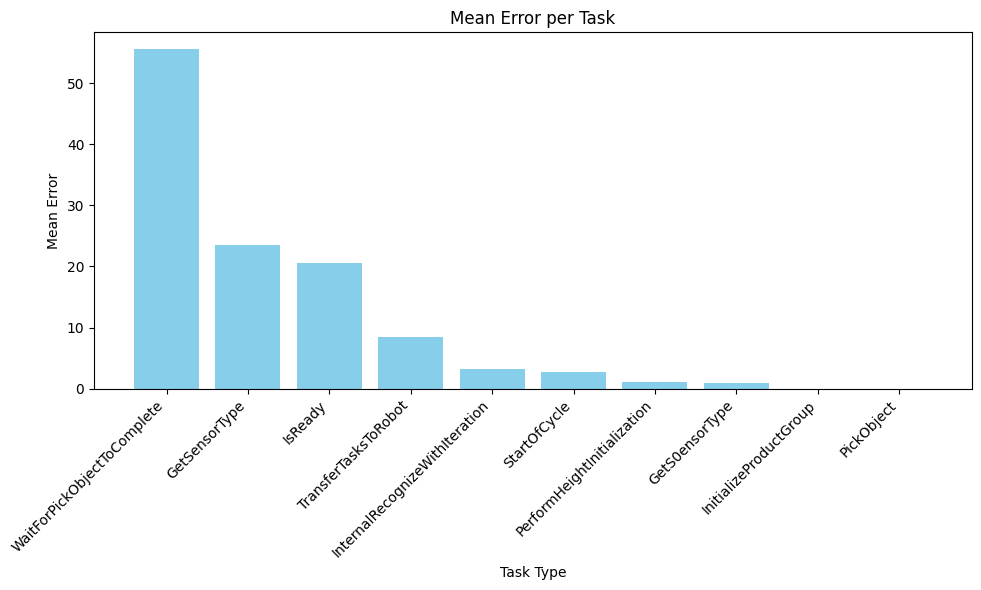

In [25]:
errors = pd.read_csv("task_error_counts.csv")

# Plot resultaterne
plt.figure(figsize=(10, 6))
plt.bar(errors['Task'], errors['Mean Error per Task'], color='skyblue')
plt.title('Mean Error per Task')
plt.xlabel('Task Type')
plt.ylabel('Mean Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Hjælpefunktion til at rette gentagne datoer
def fix_timestamp(timestamp):
    parts = timestamp.split(' ')
    if len(parts) > 2 and parts[0] == parts[1]:
        # Hvis datoen gentages, fjern den første
        return ' '.join(parts[1:])
    return timestamp

# Rette Time Start og Time End
logdata['Time Start'] = logdata['Time Start'].apply(fix_timestamp)
logdata['Time End'] = logdata['Time End'].apply(fix_timestamp)

# Hjælpefunktion til at beregne varighed i sekunder
def calculate_duration(row):
    time_format = "%Y-%m-%d %H-%M-%S.%f"  # Format med millisekunder
    start_time = datetime.strptime(row['Time Start'], time_format)
    end_time = datetime.strptime(row['Time End'], time_format)
    return (end_time - start_time).total_seconds()

# Beregn varighed, hvis ikke allerede i data
if 'Duration (s)' not in logdata.columns:
    logdata['Duration (s)'] = logdata.apply(calculate_duration, axis=1)

# Opret boxplot for hver task-type
plt.figure(figsize=(10, 6))
logdata.boxplot(column='Duration (s)', by='Task', grid=False, showfliers=False)
plt.title('Task Durations')
plt.suptitle('')  # Fjern default subtitle
plt.xlabel('Task')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Gem og vis plot
output_plot = 'task_durations_boxplot.png'
plt.savefig(output_plot)
plt.show()

# Print DataFrame for at tjekke data
print(logdata.head())

ValueError: time data '2022-11-11 2022-11-14 07-47-44.000' does not match format '%Y-%m-%d %H-%M-%S.%f'

In [ ]:

# Konverter tidspunkter til datetime objekter (hvis ikke allerede gjort)
logdata['Time Start'] = pd.to_datetime(logdata['Time Start'], format='%H-%M-%S.%f')
logdata['Time End'] = pd.to_datetime(logdata['Time End'], format='%H-%M-%S.%f')

# Beregn varigheden af hver opgave (i sekunder)
logdata['Duration'] = (logdata['Time End'] - logdata['Time Start']).dt.total_seconds()

# Læs data
errors_df = pd.read_csv("task_error_counts.csv")  # Indeholder 'task_id', 'mean_error', 'error_count', etc.
time_df = pd.read_csv("logdata_df.csv")    # Indeholder 'task_id', 'start_time', 'end_time'

# Konverter tidspunkter til datetime-format
time_df['Time Start'] = pd.to_datetime(time_df['Time Start'])
time_df['Time End'] = pd.to_datetime(time_df['Time End'])

# Beregn varighed (i sekunder) og mean duration per task
time_df['duration'] = (time_df['Time End'] - time_df['Time Start']).dt.total_seconds()
mean_time_df = time_df.groupby('Task')['duration'].mean().reset_index()
mean_time_df.rename(columns={'duration': 'mean_duration'}, inplace=True)

# Join datasæt
merged_df = pd.merge(errors_df, mean_time_df, on='Task')

# Beregn korrelation
correlation = merged_df[['mean_error', 'mean_duration']].corr()
print(correlation)


KeyError: "['mean_times'] not in index"